# Transfer Learning VGG16 and VGG19 using keras

# Lung Disease Prediction

In [1]:
# import the libraries
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE=[224,224]
train_path="Desktop/Datasets/archive/chest_xray/train"
valid_path="Desktop/Datasets/archive/chest_xray/test"

In [3]:
# import vgg16 library as shown below
# add preprocessing layer to the front of VGG
# here we will be using imagenet weights
vgg=VGG16(input_shape=IMAGE_SIZE+[3], weights="imagenet", include_top=False)
# 3 due to RGB
# include_top is false beacuse we dont want to categorise into 1000 categories

In [4]:
# dont train existing weights
for layer in vgg.layers:
    layer.trainable=False

In [5]:
# useful for getting number of output classes
folders=glob("Desktop/Datasets/archive/chest_xray/train/*")

In [6]:
# our layers-you can add more
x=Flatten()(vgg.output)

In [7]:
prediction=Dense(len(folders), activation="softmax")(x)
# create a model object
model=Model(inputs=vgg.input, outputs=prediction)

In [8]:
# view the structure of model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [9]:
# tell the model what cost and optimation to use
model.compile(loss="categorical_crossentropy",
             optimizer="adam",
             metrics=["accuracy"])

In [10]:
# using the image data generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1./255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True)

test_datagen=ImageDataGenerator(rescale=1./255)

In [11]:
# Make sure you provide the same target size as initialised for the image size
training_set=train_datagen.flow_from_directory("Desktop/Datasets/archive/chest_xray/train",
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode="categorical")

Found 5216 images belonging to 2 classes.


In [12]:
test_set=test_datagen.flow_from_directory("Desktop/Datasets/archive/chest_xray/test",
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode="categorical")

Found 624 images belonging to 2 classes.


In [13]:
# fit the model
#Run the cell. It will take time to execute
r=model.fit_generator(training_set, 
                      validation_data=test_set,
                     epochs=5,
                     steps_per_epoch=len(training_set),
                     validation_steps=len(test_set))

C:\Users\Yash Agarwal\AppData\Local\Temp\ipykernel_16712\3803358201.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r=model.fit_generator(training_set,


Epoch 1/5
163/163 [==============================] - 625s 4s/step - loss: 0.1971 - accuracy: 0.9218 - val_loss: 0.4736 - val_accuracy: 0.8574
Epoch 2/5
163/163 [==============================] - 641s 4s/step - loss: 0.1041 - accuracy: 0.9592 - val_loss: 0.4202 - val_accuracy: 0.8766
Epoch 3/5
163/163 [==============================] - 663s 4s/step - loss: 0.1015 - accuracy: 0.9630 - val_loss: 0.4066 - val_accuracy: 0.8798
Epoch 4/5
163/163 [==============================] - 696s 4s/step - loss: 0.1022 - accuracy: 0.9615 - val_loss: 0.3551 - val_accuracy: 0.9087
Epoch 5/5
163/163 [==============================] - 3060s 19s/step - loss: 0.0790 - accuracy: 0.9701 - val_loss: 0.3351 - val_accuracy: 0.8990


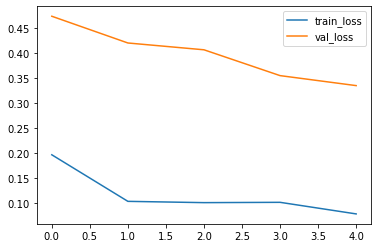

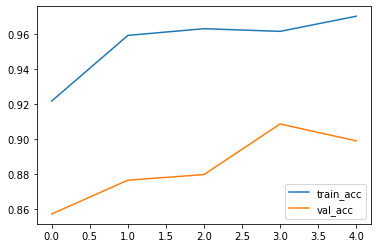

<Figure size 432x288 with 0 Axes>

In [24]:
# plot the loss
plt.plot(r.history["loss"], label="train_loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend()
plt.show()
plt.savefig("LossVal_loss")

# plot the accuracy
plt.plot(r.history['accuracy'], label='train_acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')




In [17]:
# save it as a h5 file

import tensorflow as tf

from keras.models import load_model

model.save('model_vgg16.h5')

In [30]:
from keras.models import load_model
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
model=load_model("model_vgg16.h5")
img=image.load_img("Desktop/Datasets/archive/chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg")
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
classes=model.predict(img_data)

AttributeError: module 'keras.preprocessing.image' has no attribute 'load_img'

In [19]:
# Similary you can use the same template for Vgg 19, Resnet50, Mobilenet. All you have to import the library. Below are the examples

from keras.applications.vgg19 import VGG19
from keras.applications.inception_v3 import InceptionV3